In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from NSFopen.read import nid_read
from scipy.optimize import least_squares

%matplotlib qt

In [2]:
stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/data/GLINT_AFM/'

In [8]:
def display_2d(file_name_pass, display=True):

    afm = nid_read(file_name_pass)
    data = afm.data # raw data
    param = afm.param # parameters

    #print(data)
    #print(param)

    if display:
        plt.imshow(data.Image.Backward.Topography, origin='lower')
        plt.colorbar()
        plt.show()

        plt.imshow(data.Image.Backward.Amplitude, origin='lower')
        plt.colorbar()
        plt.show()

    image_return = data.Image.Backward.Topography

    return image_return

In [4]:
def fit_1d_circle_to_points(points_1d, y_init, z_init, radius_init):
    """
    Fits a 1D circle to a set of points.

    Parameters:
    1d_points (array-like): 2D array of the 1D points to fit the circle to. (I.e., [y,z]; this is a slice along y of AFM scans)
    y_init (float): The initial y-coordinate of the circle's center.
    r_init (float): The initial radius of the circle.

    Returns:
    y_opt: optimal center of circle y-coord
    r_opt: optimal radius of circle
    h_lens: height of circle (i.e., lenslet)
    """

    # Define the function to minimize
    def residuals(params):
        y0, z0, r0 = params # initial guesses
        radius_emp = np.sqrt((points_1d[:, 0] - y0)**2 + (points_1d[:, 1] - z0)**2) # empirical radius
        return radius_emp - r0

    # Initial guess: centroid and mean distance
    initial_guess = np.hstack([y_init, z_init, radius_init])

    # Perform the optimization
    result = least_squares(residuals, initial_guess)

    #plt.plot()
    #plt.show()

    return result.x

In [5]:
def z_from_circ(y_array_pass, y0, z0, r0):
    '''
    Take given (i.e., optimized) values for a circle and generate a plot in z
    '''

    z_array = z0 + np.sqrt(r0**2 - np.power(np.subtract(y_array_pass,y0),2.))

    return z_array

In [94]:
file_name = stem + 'glint_test_lenslets_day3_00020.nid'
vals_raw = display_2d(file_name, display=False)
x_index_of_interest = 139 # see lenslet_centers_x.txt

In [95]:
# array of [y (um), z (um)]

points_1d_raw_m = np.transpose([np.linspace(0,50e-6,len(vals_raw[:,0])), vals_raw[:,x_index_of_interest]]) # units m
points_1d_raw_um = points_1d_raw_m*1e6 # units um

# subtract the offset in z from the empirical
points_1d_zeroed = np.copy(points_1d_raw_um)
points_1d_zeroed[:,1] = points_1d_raw_um[:,1]-np.min(points_1d_raw_um[:,1])

In [96]:
# Assuming vals_raw is a 2D numpy array where each row is a point
circle_params_bestfit = fit_1d_circle_to_points(points_1d=points_1d_zeroed, 
                                              y_init=38.e-5, 
                                              z_init=-229.71, 
                                              radius_init=232.)

# best fit
bestfit = z_from_circ(y_array_pass=points_1d_zeroed[:,0], 
                   y0=circle_params_bestfit[0], 
                   z0=circle_params_bestfit[1], 
                   r0=circle_params_bestfit[2])

# ideal shape (given the best-fit y0)
ideal = z_from_circ(y_array_pass=points_1d_zeroed[:,0], 
                   y0=circle_params_bestfit[0], 
                   z0=-229.71, 
                   r0=232.)

In [97]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 10))

# ax1.plot(points_1d_zeroed[:,0], ideal, 'k:', label='ideal')
ax1.plot(points_1d_zeroed[:,0], points_1d_zeroed[:,1], label='empirical')
ax1.plot(points_1d_zeroed[:,0], bestfit, label='best fit')
ax1.set_ylabel('height (um)')
ax1.legend(loc='upper right')
ax1.set_title(os.path.basename(file_name))

text_box = 'best fit lenslet params (um)\n'+\
    'center in y: '+str(np.round(circle_params_bestfit[0],2))+'\n'\
    'center in z: '+str(np.round(circle_params_bestfit[1],2))+'\n'\
    'radius: '+str(np.round(circle_params_bestfit[2],2))+'\n'\
    'height: ' + str(np.round((circle_params_bestfit[2]+circle_params_bestfit[1]),2))

ax1.text(0.95, 0.05, text_box, transform=ax1.transAxes, va='bottom', ha='right', 
         bbox=dict(facecolor='white', edgecolor='black'))

ax2.plot(points_1d_zeroed[:,0], bestfit-points_1d_zeroed[:,1])
ax2.set_xlabel('y (um)')
ax2.set_ylabel('empirical - best-fit (um)')
ax2.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')
#ax2.set_yticks(np.arange(-1.5, 2.5, 0.5))

'''
ax3.plot(points_1d_zeroed[:,0], bestfit-ideal)
ax3.set_xlabel('y (um)')
ax3.set_ylabel('best-fit - ideal (um)')
'''

plt.savefig(file_name + '.png')
#plt.show()

In [19]:
file_name + '.png'

'/Users/bandari/Documents/git.repos/glint_misc/notebooks/data/GLINT_AFM/glint_test_lenslets_day2_00001.nid.png'

In [38]:
def sphere(x0, y0, z0, r):
    # Calculate the distance from each point to the center of the sphere
    distances = np.sqrt((x - x0)**2 + (y - y0)**2 + (z - z0)**2)
    
    # Create a mask to identify the points inside the sphere
    mask = distances <= r
    
    # Set the values inside the sphere to 1 and outside the sphere to 0
    result = np.zeros_like(distances)
    result[mask] = 1
    
    return result


array([163.13980973,  78.35084902, 180.97915289])

In [22]:
x0

1

In [5]:
dir(data.Image)

['Backward',
 'Forward',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',

In [22]:
data.Image.view

NameError: name 'data' is not defined

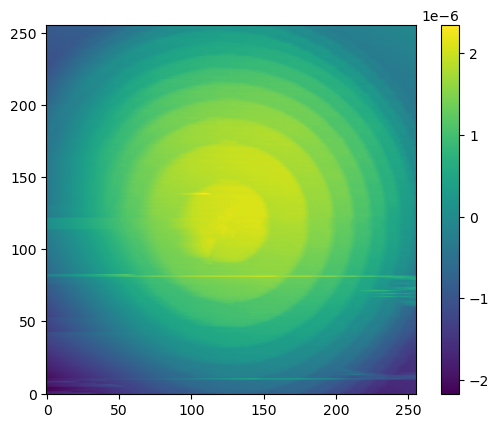

In [6]:
plt.imshow(data.Image.Backward.Topography, origin='lower')
plt.colorbar()
plt.show()

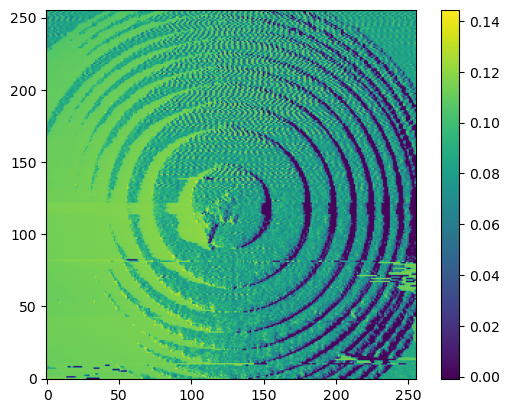

In [7]:
plt.imshow(data.Image.Backward.Amplitude, origin='lower')
plt.colorbar()
plt.show()